In [1]:
import numpy as np
%matplotlib inline

# ALOS

## Define Area Extents  

In [2]:
from datetime import datetime
# That I can sqap areas
vietnam_extent = dict(
    lat  = (10.9348, 11.0190),
    lon  = (107.8164, 107.9168),
)

menindee_extent = dict(
    lat = ( -32.420,-32.272),
    lon = (142.2348, 142.407),
)

kenya_extent = dict(
    lat = (2.4787, 2.7887),
    lon = (35.7330, 37.4963)
)

extent = kenya_extent

A quick visualization of the area before it is loaded through the datacube 

In [3]:
from utils.data_cube_utilities.dc_display_map import display_map

display_map(latitude  = extent['lat'],
            longitude = extent['lon'])  

# Display Available Products. Pick a product to load. 
The following code loads a datacube object. Loads a list of available products, and filters in favor of products containing the word `s1`. 

In [4]:
import datacube
dc = datacube.Datacube()

products = dc.list_products()
products[products['name'].str.contains("alos")]  

/home/localuser/Datacube/datacube_env/lib/python3.6/site-packages/psycopg2-2.7.5-py3.6-linux-x86_64.egg/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


,name,description,lon,instrument,platform,label,time,format,lat,creation_time,product_type,crs,resolution,tile_size,spatial_dimensions
id,,,,,,,,,,,,,,,
90,alos02_palsar02_scansar,ALOS-2 PALSAR JJ-FAST mosaic tiles generated f...,None,PALSAR-2,ALOS-2,None,None,GeoTiff,None,None,tile,NaN,NaN,NaN,NaN
91,alos02_palsar02_scansar_colombia,ALOS2 PALSAR JJFAST tile in DN format processe...,None,PALSAR-2,ALOS-2,None,None,NetCDF,None,None,tile,EPSG:4326,"[-0.0002666666667, 0.0002666666667]","[0.5333333334, 0.5333333334]","(latitude, longitude)"
92,alos02_palsar02_scansar_samoa,ALOS2 PALSAR JJFAST tile in DN format processe...,None,PALSAR-2,ALOS-2,None,None,NetCDF,None,None,tile,EPSG:4326,"[-0.000226039783001808, 0.000231481481481481]","[1, 1]","(latitude, longitude)"
93,alos02_palsar02_scansar_vietnam,ALOS2 PALSAR JJFAST tile in DN format processe...,None,PALSAR-2,ALOS-2,None,None,NetCDF,None,None,tile,EPSG:4326,"[-0.00022583559168925, 0.000241312741312741]","[1, 1]","(latitude, longitude)"
46,alos2_jjfast_scansar_tile,ALOS-2 PALSAR JJ-FAST mosaic tiles generated f...,None,PALSAR,ALOS_2,None,None,GeoTiff,None,None,tile,NaN,NaN,NaN,NaN
61,alos2_jjfast_scansar_tile_colombia,ALOS2 PALSAR JJFAST tile in DN format processe...,None,PALSAR,ALOS_2,None,None,NetCDF,None,None,tile,EPSG:4326,"[-0.0002666666667, 0.0002666666667]","[0.5333333334, 0.5333333334]","(latitude, longitude)"
64,alos2_palsar2_scansar,ALOS-2 PALSAR JJ-FAST mosaic tiles generated f...,None,PALSAR_2,ALOS_2,None,None,GeoTiff,None,None,tile,NaN,NaN,NaN,NaN
65,alos2_palsar2_scansar_caqueta,ALOS2 PALSAR JJFAST tile in DN format processe...,None,PALSAR_2,ALOS_2,None,None,NetCDF,None,None,tile,EPSG:4326,"[-0.0002666666667, 0.0002666666667]","[0.5333333334, 0.5333333334]","(latitude, longitude)"
50,alos2_palsar_colombia,ALOS2 PALSAR tile in DN format processed for t...,None,PALSAR,ALOS_2,None,None,NetCDF,None,None,gamma0,EPSG:4326,"[-0.0002666666667, 0.0002666666667]","[0.5333333334, 0.5333333334]","(latitude, longitude)"


# Define a product and platform 

In [5]:
menindee_extent["product"]  = "s1_gamma0_menindee_lakes"
menindee_extent["platform"] = "SENTINEL_1"

kenya_extent["product"]   = "alos_palsar_kenya"
kenya_extent["platform"]  = "ALOS"

# View basic metadata about this product

In [6]:
from utils.data_cube_utilities.data_access_api import DataAccessApi
dca = DataAccessApi()

dca.get_datacube_metadata(platform = extent["platform"],
                         product  = extent["product"])

In [7]:
product_details = dc.list_products()[dc.list_products().name ==extent["product"]]
product_details

,name,description,lon,instrument,platform,label,time,format,lat,creation_time,product_type,crs,resolution,tile_size,spatial_dimensions
id,,,,,,,,,,,,,,,
54,alos_palsar_kenya,ALOS PALSAR tile in DN format processed for th...,None,PALSAR,ALOS,None,None,NetCDF,None,None,gamma0,EPSG:4326,"[-0.0002666666667, 0.0002666666667]","[0.5333333334, 0.5333333334]","(latitude, longitude)"


# Load Data  


In [8]:
import datacube
dc = datacube.Datacube()

In [9]:
dc.list_measurements().loc[extent['product']]

,aliases,dtype,flags_definition,name,nodata,units
measurement,,,,,,
hh,[hh],int32,NaN,hh,0,1
hv,[hv],int32,NaN,hv,0,1
date,[date],int32,NaN,date,0,1
mask,[mask],uint8,"{'cloud_confidence': {'bits': [0, 1, 2, 3, 4, ...",mask,0,1


In [10]:
print(extent)
dataset = dc.load(**extent, measurements=['hh', 'hv'])

{'lat': (2.4787, 2.7887), 'lon': (35.733, 37.4963), 'product': 'alos_palsar_kenya', 'platform': 'ALOS'}


In [11]:
dataset

<xarray.Dataset>
Dimensions:    (latitude: 1163, longitude: 6614, time: 4)
Coordinates:
  * time       (time) datetime64[ns] 2007-01-01 2008-01-01 2009-01-01 2010-01-01
  * latitude   (latitude) float64 2.789 2.788 2.788 2.788 ... 2.479 2.479 2.479
  * longitude  (longitude) float64 35.73 35.73 35.73 35.73 ... 37.5 37.5 37.5
Data variables:
    hh         (time, latitude, longitude) int32 1134 1486 1501 ... 1708 1733
    hv         (time, latitude, longitude) int32 543 486 589 982 ... 737 745 940
Attributes:
    crs:      EPSG:4326

# View an acquisition in dataset

In [12]:
first_slice = dataset.isel(time = 1) # iselect selects by index, rather than value.

In [13]:
first_slice

<xarray.Dataset>
Dimensions:    (latitude: 1163, longitude: 6614)
Coordinates:
    time       datetime64[ns] 2008-01-01
  * latitude   (latitude) float64 2.789 2.788 2.788 2.788 ... 2.479 2.479 2.479
  * longitude  (longitude) float64 35.73 35.73 35.73 35.73 ... 37.5 37.5 37.5
Data variables:
    hh         (latitude, longitude) int32 905 1140 1025 1076 ... 2401 2434 2758
    hv         (latitude, longitude) int32 521 511 495 589 ... 1107 979 1627
Attributes:
    crs:      EPSG:4326

> Plotting helper

In [14]:
def figure_ratio(ds, fixed_width = 20):
    width = fixed_width
    height = len(ds.latitude) * (fixed_width / len(ds.longitude))
    return (width, height)

### plot vh
A few outliers might distort the output. The following code will plot `vh` bands on a logarithmic scale

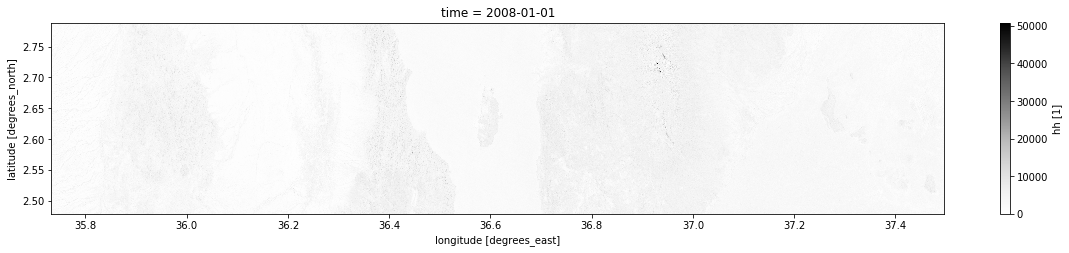

In [15]:
%matplotlib inline
first_slice.hh.plot(cmap = "Greys",figsize = figure_ratio(first_slice))

### plot vv
A few outliers might distort the output. The following code will plot `vh` bands on a logarithmic scale

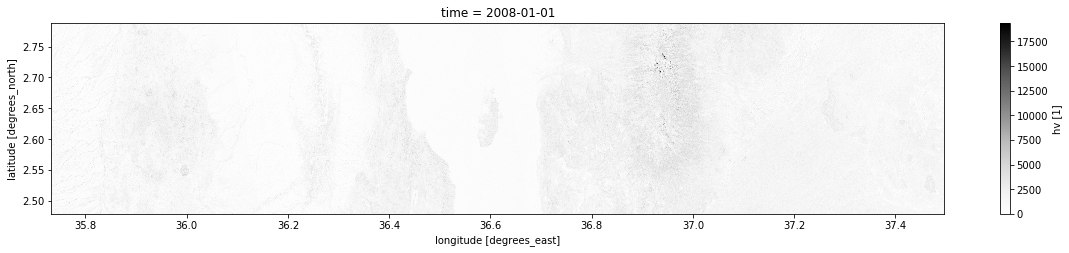

In [16]:
first_slice.hv.plot(cmap = "Greys", figsize = figure_ratio(first_slice))

### plot vv/vh

#### Define ratio function
This is a very simple function. It's defined in this notebook just to show how how arithmetic operations scale on an xarray datasets and how to add/augment a dataset with synthetic variables
<br>  
$$ dataset_{a\_per\_b} = \frac{dataset_a}{dataset_b} $$  
  
<br>

In [17]:
import xarray as xr 
def augment_dataset_with_ratio(ds: xr.Dataset, band_name_1: str, band_name_2 :str) -> xr.Dataset:
    a_per_b = (ds[band_name_1]/ds[band_name_2])
    a_per_b = a_per_b.to_dataset(name = '{b1}_per_{b2}'.format(b1 = band_name_1, b2 = band_name_2)) # turn xarray.dataarray into xarray dataset and name dataset variable.
    return ds.merge(a_per_b)

<br> 
<br> 

Apply function and display new `xarray.Dataset`  
<br> 


In [18]:
first_slice = augment_dataset_with_ratio(first_slice, "hv", "hh")
first_slice = augment_dataset_with_ratio(first_slice, "hh", "hv")

print(first_slice)

<xarray.Dataset>
Dimensions:    (latitude: 1163, longitude: 6614)
Coordinates:
    time       datetime64[ns] 2008-01-01
  * latitude   (latitude) float64 2.789 2.788 2.788 2.788 ... 2.479 2.479 2.479
  * longitude  (longitude) float64 35.73 35.73 35.73 35.73 ... 37.5 37.5 37.5
Data variables:
    hh         (latitude, longitude) int32 905 1140 1025 1076 ... 2401 2434 2758
    hv         (latitude, longitude) int32 521 511 495 589 ... 1107 979 1627
    hv_per_hh  (latitude, longitude) float64 0.5757 0.4482 ... 0.4022 0.5899
    hh_per_hv  (latitude, longitude) float64 1.737 2.231 2.071 ... 2.486 1.695
Attributes:
    crs:      EPSG:4326


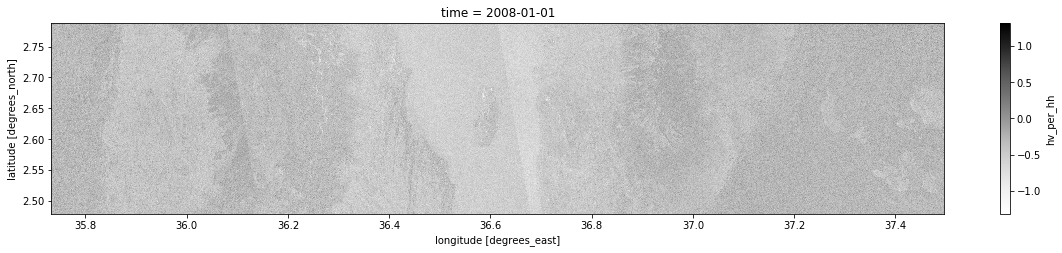

In [ ]:
np.log10(first_slice.hv_per_hh).plot(cmap = "Greys", figsize = figure_ratio(first_slice))

### plot false color

The function below defines a basic normaization and plotting function for xarrays. I would not recommend re-using this unless you understand your data in great enough detail to determine that this suites your needs. This is a first pass at including a plotting utility in our S1 analysis workflow. The canonical approach or desired results would be something along the lines of following established processing methods used in something like ESA's [Sentinel-1 Toolbox](http://seom.esa.int/landtraining2015/files/Day_5/D5P1a_LTC2015_Foumelis.pdf) or from the [Sentinel Callibration Guide](https://sentinel.esa.int/documents/247904/685163/S1-Radiometric-Calibration-V1.0.pdf).

In [ ]:
import numpy as np
import xarray as xr

def build_rgb_from_ds(_dataset: xr.Dataset,
                      r:str = None,
                      g:str = None,
                      b:str = None, 
                      logarithmic_scale_enabled = False):
    
    norm = _dataset.copy()

    if logarithmic_scale_enabled == True:
        norm[r] = np.log10(norm[r]) 
        norm[g] = np.log10(norm[g]) 
        norm[b] = np.log10(norm[b]) 

    norm = (255 * _dataset/_dataset.max()).astype(np.uint16)
    
    _r = norm[r].values #.astype(np.float32)
    _g = norm[g].values #.astype(np.float32)
    _b = norm[b].values #_per_vh.astype(np.float32)
    _rgb = np.dstack([_r,_g,_b])
    return _rgb

In [ ]:
rgb = build_rgb_from_ds(first_slice,
                        r = "hv", 
                        g = "hh",
                        b = "hv_per_hh")

<br>

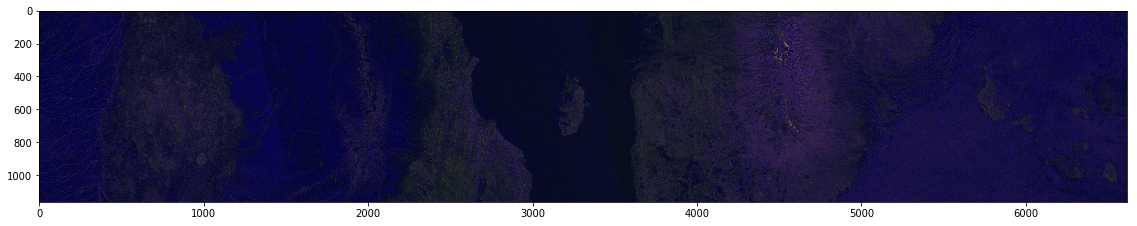

In [ ]:
import matplotlib.pyplot as plt
plt.figure( figsize = figure_ratio(first_slice))
plt.imshow( rgb )

<br>  
# Build a median value composite(mosaic) for your time series 

The following section gets messy. We build a mosaic peice by peice, rather than all at once. This employs a chunking processes whereby small extents are queried and processed.  

In [ ]:
from utils.data_cube_utilities.dc_chunker import create_geographic_chunks, combine_geographic_chunks

geographic_chunks = create_geographic_chunks(latitude=extent["lat"], longitude=extent["lon"], geographic_chunk_size=.05)

<br>

In [ ]:
for x in geographic_chunks:
    print(x)

{'longitude': (35.733, 37.4963), 'latitude': (2.4787, 2.506881818181818)}
{'longitude': (35.733, 37.4963), 'latitude': (2.506881818181818, 2.535063636363636)}
{'longitude': (35.733, 37.4963), 'latitude': (2.535063636363636, 2.5632454545454544)}
{'longitude': (35.733, 37.4963), 'latitude': (2.5632454545454544, 2.5914272727272727)}
{'longitude': (35.733, 37.4963), 'latitude': (2.5914272727272727, 2.619609090909091)}
{'longitude': (35.733, 37.4963), 'latitude': (2.619609090909091, 2.647790909090909)}
{'longitude': (35.733, 37.4963), 'latitude': (2.647790909090909, 2.675972727272727)}
{'longitude': (35.733, 37.4963), 'latitude': (2.675972727272727, 2.7041545454545455)}
{'longitude': (35.733, 37.4963), 'latitude': (2.7041545454545455, 2.732336363636364)}
{'longitude': (35.733, 37.4963), 'latitude': (2.732336363636364, 2.7605181818181816)}
{'longitude': (35.733, 37.4963), 'latitude': (2.7605181818181816, 2.7887)}


<br>  

In [ ]:
from utils.data_cube_utilities.dc_mosaic import create_median_mosaic
from utils.data_cube_utilities.dc_sar_utils import dn_to_db 
import warnings
warnings.filterwarnings("ignore")

import numpy as np  

measurements = ['hv', 'hh']
product_chunks = []

# This part is unpythonic but explicit
for index, chunk in enumerate(geographic_chunks):
    data = dca.get_dataset_by_extent(extent["product"], 
                                    longitude=chunk['longitude'], latitude=chunk['latitude'], 
                                    measurements=measurements)
    if 'hv' in data:
        product_chunks.append(create_median_mosaic(data, dtype="float32", no_data=0))
        

final_mosaic = combine_geographic_chunks(product_chunks)

In [ ]:
final_mosaic

<xarray.Dataset>
Dimensions:    (latitude: 1166, longitude: 6614)
Coordinates:
  * latitude   (latitude) float64 2.789 2.788 2.788 2.788 ... 2.479 2.479 2.479
  * longitude  (longitude) float64 35.73 35.73 35.73 35.73 ... 37.5 37.5 37.5
Data variables:
    hv         (latitude, longitude) float64 536.5 538.5 ... 935.5 1.408e+03
    hh         (latitude, longitude) float64 1.02e+03 1.226e+03 ... 2.672e+03

In [ ]:
final_mosaic = augment_dataset_with_ratio(final_mosaic, "hv", "hh")
final_mosaic = augment_dataset_with_ratio(final_mosaic, "hh", "hv")

In [ ]:
final_mosaic

<xarray.Dataset>
Dimensions:    (latitude: 1166, longitude: 6614)
Coordinates:
  * latitude   (latitude) float64 2.789 2.788 2.788 2.788 ... 2.479 2.479 2.479
  * longitude  (longitude) float64 35.73 35.73 35.73 35.73 ... 37.5 37.5 37.5
Data variables:
    hv         (latitude, longitude) float64 536.5 538.5 ... 935.5 1.408e+03
    hh         (latitude, longitude) float64 1.02e+03 1.226e+03 ... 2.672e+03
    hv_per_hh  (latitude, longitude) float64 0.5262 0.4391 ... 0.4929 0.5268
    hh_per_hv  (latitude, longitude) float64 1.9 2.278 1.961 ... 2.029 1.898

### Plot Median Composite

In [ ]:
rgb = build_rgb_from_ds(final_mosaic,
                        r = "hv", 
                        g = "hh",
                        b = "hh_per_hv")

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = figure_ratio(final_mosaic))
plt.imshow( rgb )

<br>
<br>
<br>

# Pixel Drill Analysis


In [ ]:
dataset = augment_dataset_with_ratio(dataset, "hv", "hh") ## Compute HV/HH for entire dataset rather than just a slice(see section above)


### Chose a pixel  
Choose a pixel  from the bounded box below (A click will reveal lat and lon coordinates)     
<br> 

In [ ]:
display_map(latitude  = extent['lat'], longitude = extent['lon'])  

In [ ]:
# Lat and Lon coordinates extracted from the map above 
pixel_lat = -32.3626 #Menindee
pixel_lon = 142.2764 #Menindee

pixel_lat = 11.1306
pixel_lon = 107.6052

Select a pixel from our `xarray.Dataset` using nearest neighbor.  

In [ ]:
pixel = dataset.sel(latitude  = pixel_lat,
                    longitude = pixel_lon,
                    method = 'nearest') # nearest neighbor selection  

<br> 

In [ ]:
pixel

<br> 

### Distributions( pixel histogram per band)  

#### HH

In [ ]:
pixel.hh.plot.hist()

#### HV

In [ ]:
pixel.hv.plot.hist()

### Plot Pixel Bands

### HH

In [ ]:
## X-axis time, Y-axis values of vh
plt.figure(figsize = (20,5)) 
plt.scatter(pixel.time.values, pixel.hh.values)

### Log10(HH)

In [ ]:
## X-axis time, Y-axis values of vh
plt.figure(figsize = (20,5)) 
plt.scatter(pixel.time.values,  np.log10(pixel.hh.values))

### VV

In [ ]:
## X-axis time, Y-axis values of vv
plt.figure(figsize = (20,5))
plt.scatter(pixel.time.values,  pixel.hv.values)

### Log10(VV) 

In [ ]:
## X-axis time, Y-axis values of vv
plt.figure(figsize = (20,5))
plt.scatter(pixel.time.values,  np.log10(pixel.hv.values))

### VV/VH

In [ ]:
## X-axis time, Y-axis values of vv
plt.figure(figsize = (20,5))
plt.scatter(pixel.time.values, pixel.hv_per_hh.values)

### Log10(VV) / Log10(VH)  

In [ ]:
## X-axis time, Y-axis values of vv
plt.figure(figsize = (20,5))
plt.scatter(pixel.time.values,
            (np.log10(pixel.hv) / np.log10(pixel.hh)).values
           )

<br>  
<br>  
# Box and Whisker Plot for the Loaded Dataset

In [ ]:
def ds_to_timeseries(ds, band, log = False):
    da = ds[band]
    da = np.log10(da) if log == True else da
    da_by_time_slices = [da.isel(time = i) for i in range(len(da.time))]
#     return [x.values.flatten() for x in da_by_time_slices]
    return [x.values[np.isfinite(x.values)].flatten() for x in da_by_time_slices]    

### HV

In [ ]:
plt.figure(figsize = (20,5))

plt.boxplot(ds_to_timeseries(dataset, "hv"), 0, "");


### HH

In [ ]:
plt.figure(figsize = (20,5))
plt.boxplot(ds_to_timeseries(dataset, "hh"), 0, "");

### HV/HH

In [ ]:
plt.figure(figsize = (20,5))
plt.boxplot(ds_to_timeseries(dataset, "hv_per_hh"), 0, "");

## Apply threshold to data  

In [ ]:
import matplotlib
def plot_threshold(ds, band_name, bottom = None , top = None, log_scaled = False, cmap_name = 'Greys'):
    # Threshold is applied to original data, not log scaled data(if you haven't scaled already)
    _range = "Full {} range: {}-{}".format(band_name, ds[band_name].min().values,ds[band_name].max().values )
    
    def figure_ratio(ds, fixed_width = 20):
        width = fixed_width
        height = len(ds.latitude) * (fixed_width / len(ds.longitude))
        return (width, height)
    
    selection = ds[band_name]
    
    my_cmap = matplotlib.cm.get_cmap(cmap_name)
    my_cmap.set_over('r')
    my_cmap.set_under('b')

    plt.figure(figsize = figure_ratio(ds))
    
    selection = np.log10(selection) if log_scaled == True else selection
    
    bottom    = np.log10(bottom)    if log_scaled == True and bottom is not None else bottom
    top       = np.log10(top)       if log_scaled == True and top is not None else top
    
    selection.plot(cmap = my_cmap, vmax =top, vmin = bottom)    
    plt.figtext(0.7,0,_range, horizontalalignment = "center")

### HV(no threshold)

In [ ]:
plot_threshold(first_slice, "hh", log_scaled = False)

### HV(threshold) 

In [ ]:
plot_threshold(first_slice, "hv",
               bottom = 437, 
               top = 3500)

### HH( no threshold ) 

In [ ]:
plot_threshold(first_slice, "hh")

### HV(threshold) 

In [ ]:
plot_threshold(first_slice,
               "hh",
               bottom = 1000,
               top = 10000
               )